In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
dataset = pd.read_csv('breast-cancer-wisconsin.csv') 

X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values 

print(np.shape(X),np.shape(y))

(698, 10) (698,)


In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

X_train,y_train=X_train[y_train.argsort()],y_train[y_train.argsort()]
X_test,y_test=X_test[y_test.argsort()],y_test[y_test.argsort()]
 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()   
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Mauricio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Mauricio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Mauricio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test) 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

C:\Users\Mauricio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[86  3]
 [ 0 51]]


In [5]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

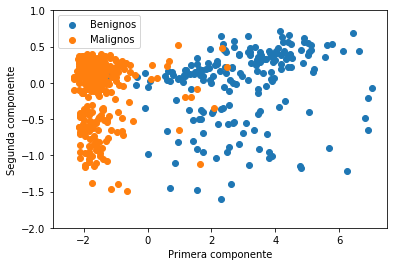

In [6]:
# Se obtienen los indices de los datos organizados por clases
indexA = np.where(np.array(y_train)==2)
indexB = np.where(np.array(y_train)==4)

# Se grafican los datos con dos características principales
plt.scatter(X_train_pca[indexB,0],X_train_pca[indexB,1],label="Benignos")
plt.scatter(X_train_pca[indexA,0],X_train_pca[indexA,1],label="Malignos")
plt.xlabel("Primera componente")
plt.ylabel("Segunda componente")
plt.ylim(-2,1)
plt.legend()
plt.show()

In [7]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression(random_state = 0) # CLASIFICAR
classifier.fit(X_train_pca, y_train) 

# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = classifier.predict(X_test_pca) 

# making confusion matrix between 
#  test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[86  3]
 [ 1 50]]


C:\Users\Mauricio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


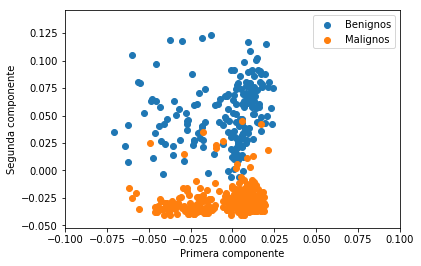

In [18]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
X_train_ica = ica.fit_transform(X_train)  # Reconstruct signals
X_test_ica = ica.transform(X_test)

# Se grafican los datos con dos características principales
plt.scatter(X_train_ica[indexB,0],X_train_ica[indexB,1],label="Benignos")
plt.scatter(X_train_ica[indexA,0],X_train_ica[indexA,1],label="Malignos")
plt.xlabel("Primera componente")
plt.ylabel("Segunda componente")
plt.xlim(-0.1,0.1)
plt.legend()
plt.show()

In [19]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_ica, y_train)

# Prediccion del conjunto de prueba para 
# comprar los resultados
y_pred = classifier.predict(X_test_ica)

# Creamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[89  0]
 [40 11]]


C:\Users\Mauricio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
